### Gráficos para análise do desempenho da MLP

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_csv("csvs/grid_search_results.csv")

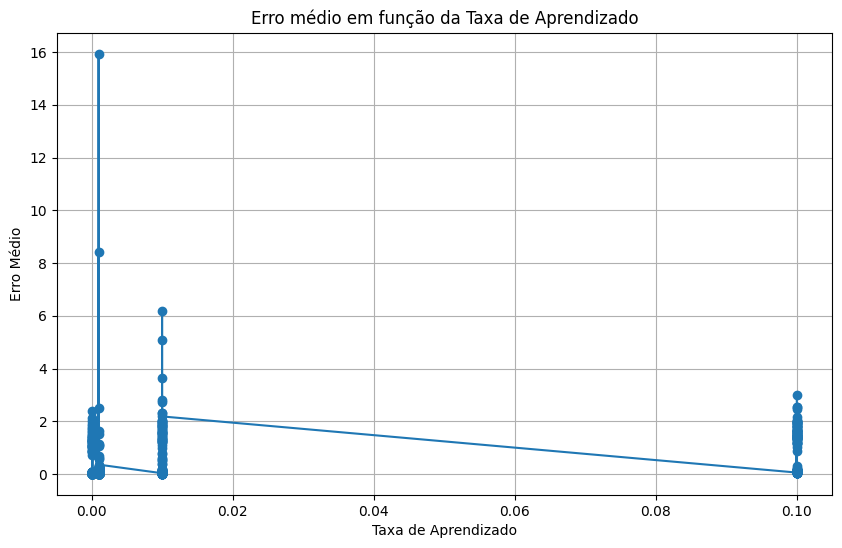

In [30]:
def plot_mean_error_vs_learning_rate(results):
    learning_rates = results['Taxa de aprendizado']
    mean_errors = results['Erro médio']

    #Criando o gráfico
    plt.figure(figsize=(10,6))
    plt.plot(learning_rates, mean_errors, marker='o', linestyle='-')
    plt.title('Erro médio em função da Taxa de Aprendizado')
    plt.xlabel('Taxa de Aprendizado')
    plt.ylabel('Erro Médio')
    plt.grid(True)
    plt.show()

plot_mean_error_vs_learning_rate(df)

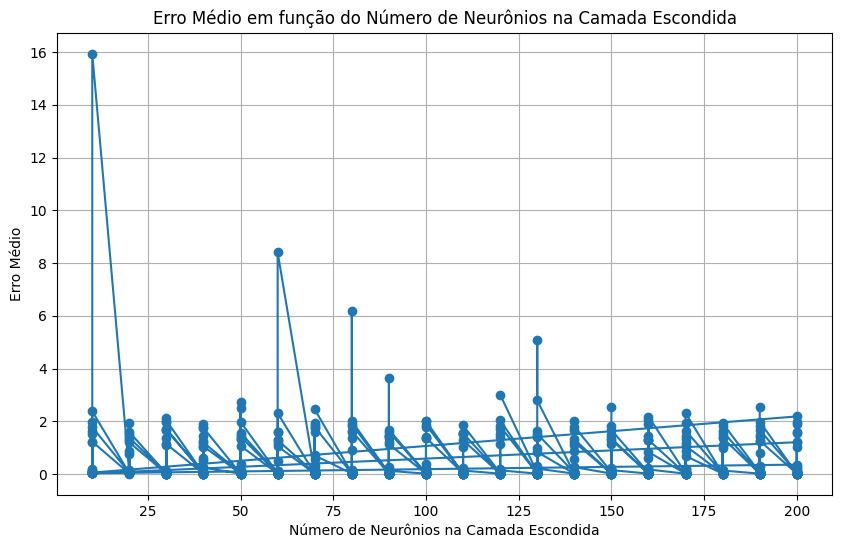

In [31]:
def plot_mean_error_vs_neurons(results):
    # Extraindo os dados
    neurons = results['Nº de neuronios camada escondida']
    mean_errors = results['Erro médio']

    # Criando o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(neurons, mean_errors, marker='o', linestyle='-')
    plt.title('Erro Médio em função do Número de Neurônios na Camada Escondida')
    plt.xlabel('Número de Neurônios na Camada Escondida')
    plt.ylabel('Erro Médio')
    plt.grid(True)
    plt.show()

# Exemplo de uso:
plot_mean_error_vs_neurons(df)

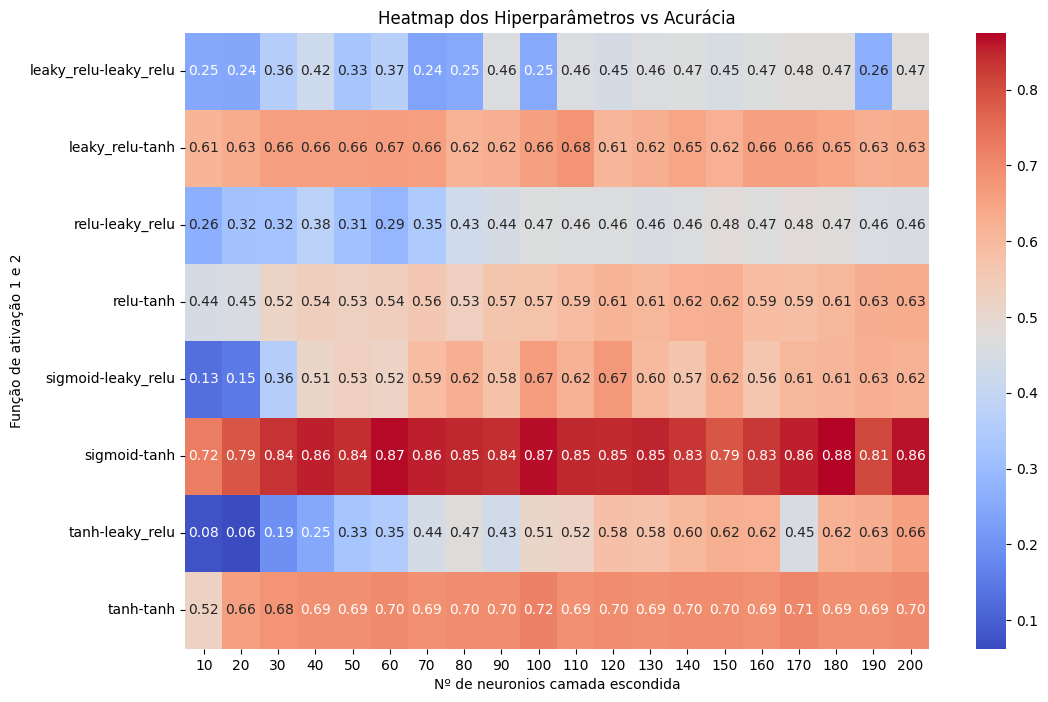

In [32]:
# Pivotar os dados para criar um heatmap
heatmap_data = df.pivot_table(values='Acurácia', 
                              index=['Função de ativação 1', 'Função de ativação 2'], 
                              columns='Nº de neuronios camada escondida')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap dos Hiperparâmetros vs Acurácia')
plt.xlabel('Nº de neuronios camada escondida')
plt.ylabel('Função de ativação 1 e 2')
plt.show()


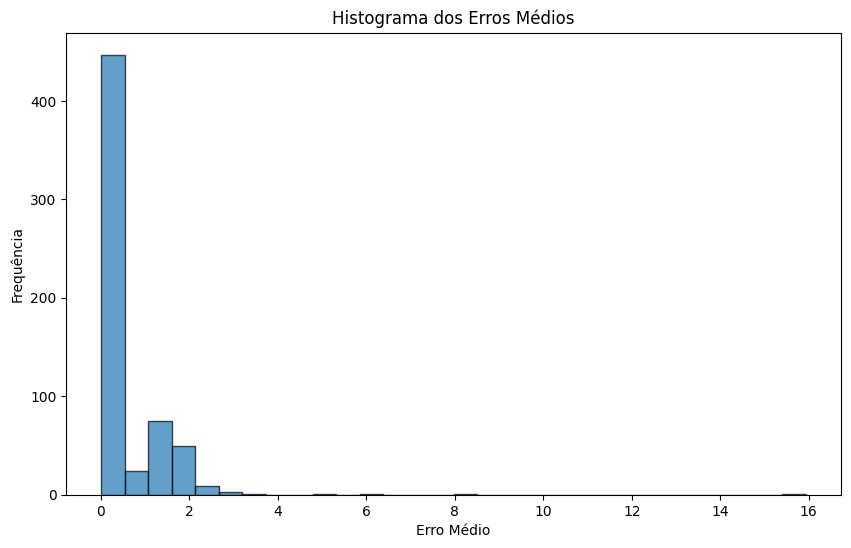

In [33]:
# Calcular os erros
errors = df['Erro médio']

# Plotar o histograma dos erros
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma dos Erros Médios')
plt.xlabel('Erro Médio')
plt.ylabel('Frequência')
plt.show()


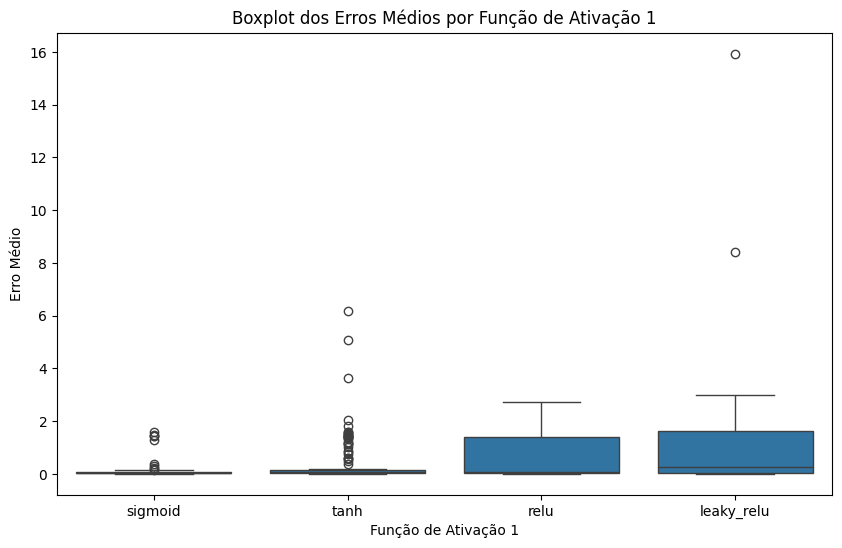

In [34]:
# Plotar boxplot dos erros
plt.figure(figsize=(10, 6))
sns.boxplot(x='Função de ativação 1', y='Erro médio', data=df)
plt.title('Boxplot dos Erros Médios por Função de Ativação 1')
plt.xlabel('Função de Ativação 1')
plt.ylabel('Erro Médio')
plt.show()


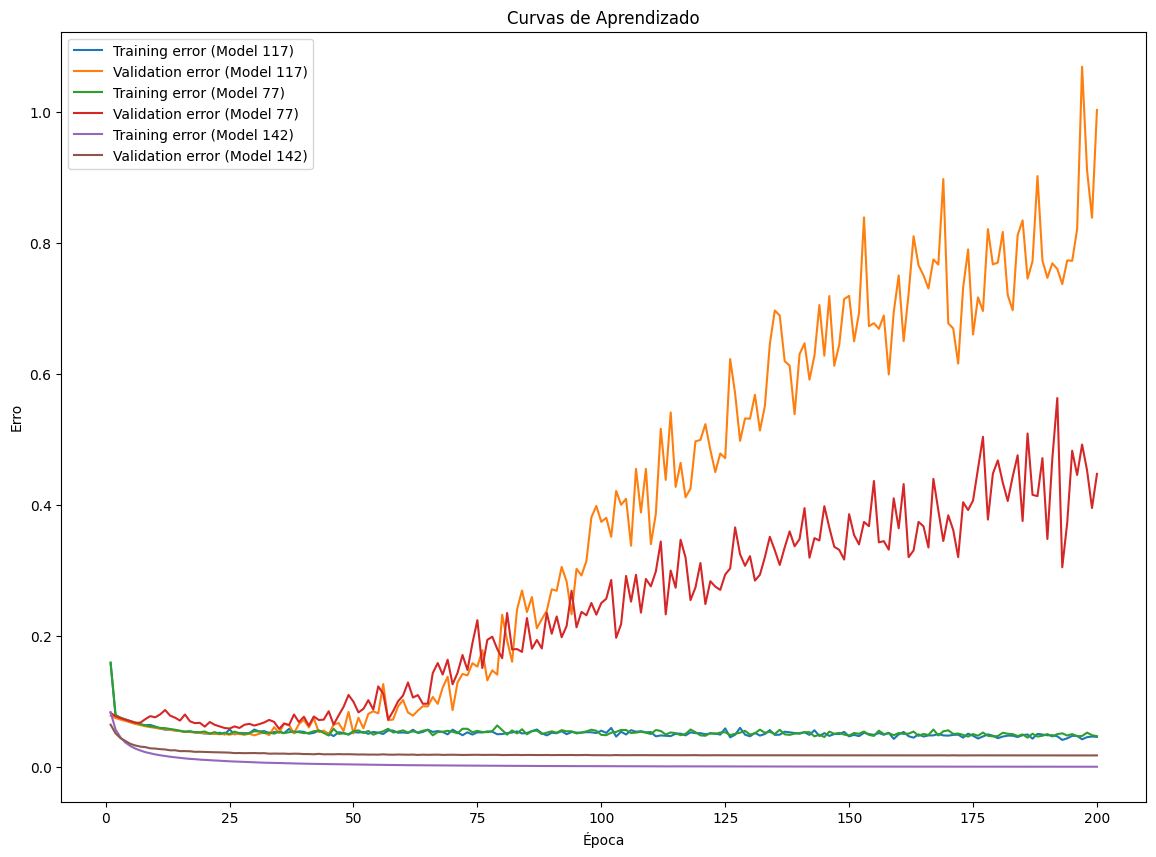

Taxa de aprendizado                                                            0.0001
Nº de neuronios camada escondida                                                  150
Função de ativação 1                                                             relu
Função de ativação 2                                                       leaky_relu
Acurácia                                                                     0.935897
Erro médio                                                                   1.121867
Desvio padrão de erro                                                        4.049226
Erros de treinamento por época      [0.15844990656675856, 0.07878923537751131, 0.0...
Erros de validação por época        [0.07825865243092658, 0.074663217558775, 0.072...
Name: 117, dtype: object


In [35]:
# Selecionar as melhores combinações de hiperparâmetros
best_models = df.nlargest(3, 'Acurácia')

# Plotar as curvas de aprendizado para os melhores modelos
plt.figure(figsize=(14, 10))
for idx, row in best_models.iterrows():
    train_errors = eval(row['Erros de treinamento por época'])
    val_errors = eval(row['Erros de validação por época'])
    epochs = range(1, len(train_errors) + 1)
    
    plt.plot(epochs, train_errors, label=f'Training error (Model {idx})')
    plt.plot(epochs, val_errors, label=f'Validation error (Model {idx})')

plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.show()

print(best_models.iloc[0])


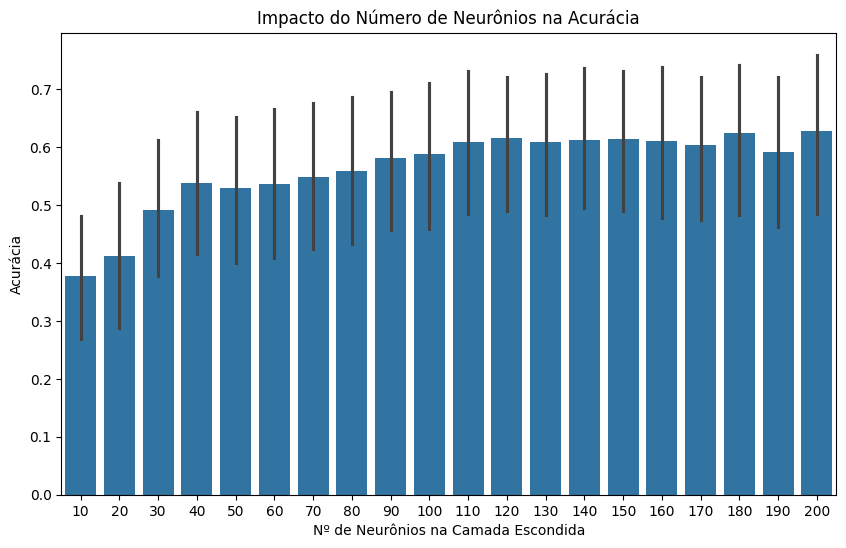

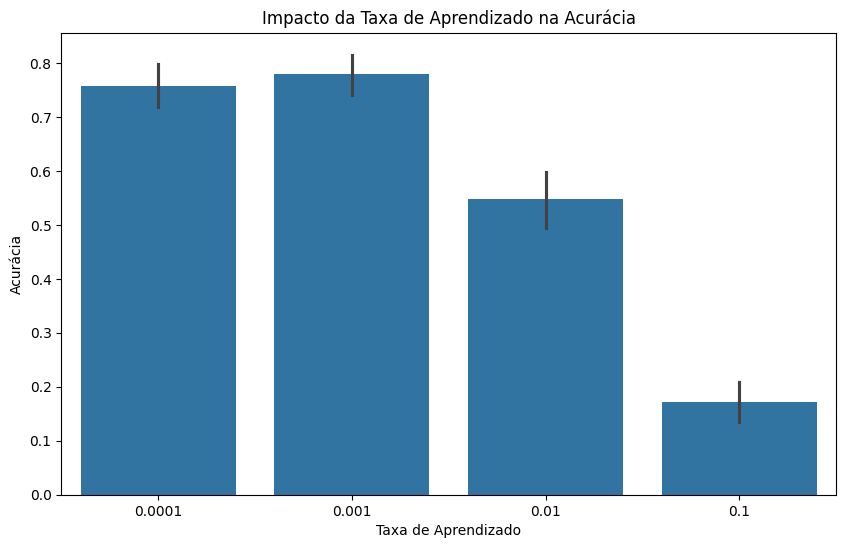

In [36]:
# Gráfico de Importância dos Hiperparâmetros (Sensibilidade)
import seaborn as sns
import matplotlib.pyplot as plt

# Analisando a importância do número de neurônios na camada escondida
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº de neuronios camada escondida', y='Acurácia', data=df)
plt.title('Impacto do Número de Neurônios na Acurácia')
plt.xlabel('Nº de Neurônios na Camada Escondida')
plt.ylabel('Acurácia')
plt.show()

# Analisando a importância da taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.barplot(x='Taxa de aprendizado', y='Acurácia', data=df)
plt.title('Impacto da Taxa de Aprendizado na Acurácia')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.show()


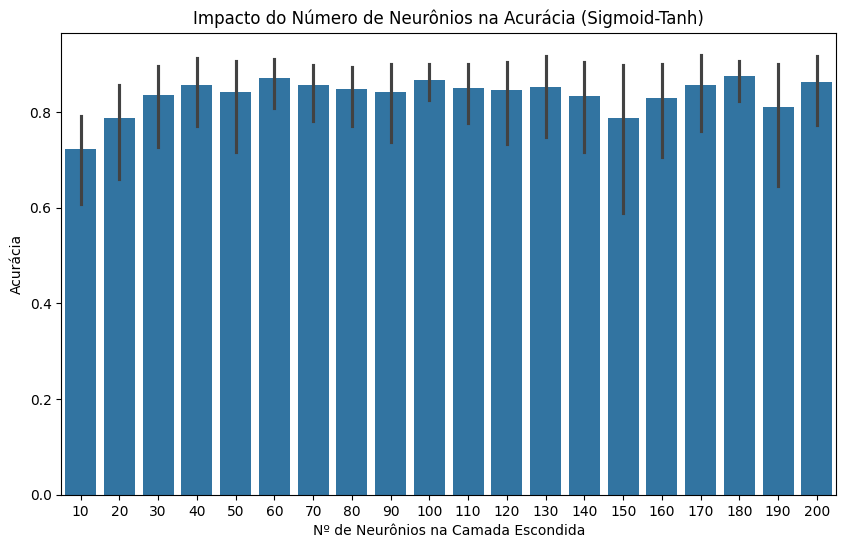

In [38]:
df_sigmoid = df[df['Função de ativação 1'] == 'sigmoid']
df_sigmoid_tanh = df_sigmoid[df_sigmoid['Função de ativação 2'] == 'tanh']

# Impacto do Número de Neurônios na Acurácia (Sigmoid-Tanh)
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº de neuronios camada escondida', y='Acurácia', data=df_sigmoid_tanh)
plt.title('Impacto do Número de Neurônios na Acurácia (Sigmoid-Tanh)')
plt.xlabel('Nº de Neurônios na Camada Escondida')
plt.ylabel('Acurácia')
plt.show()


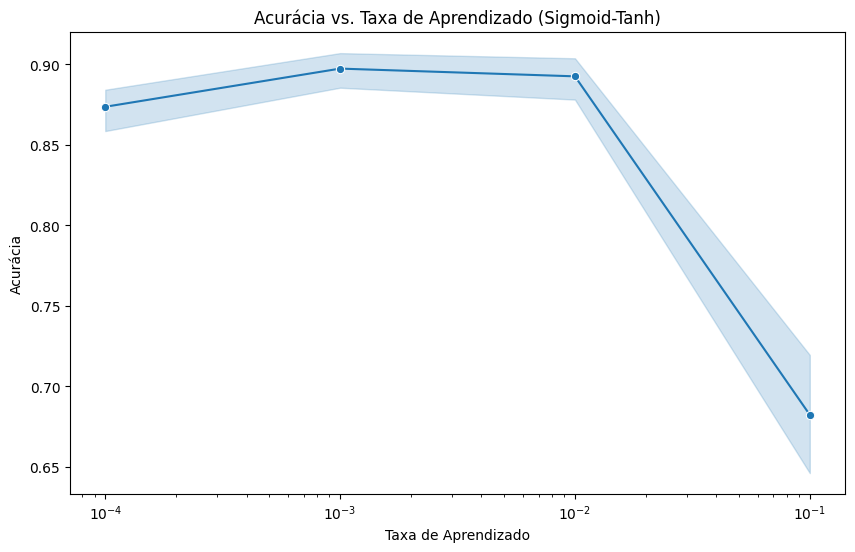

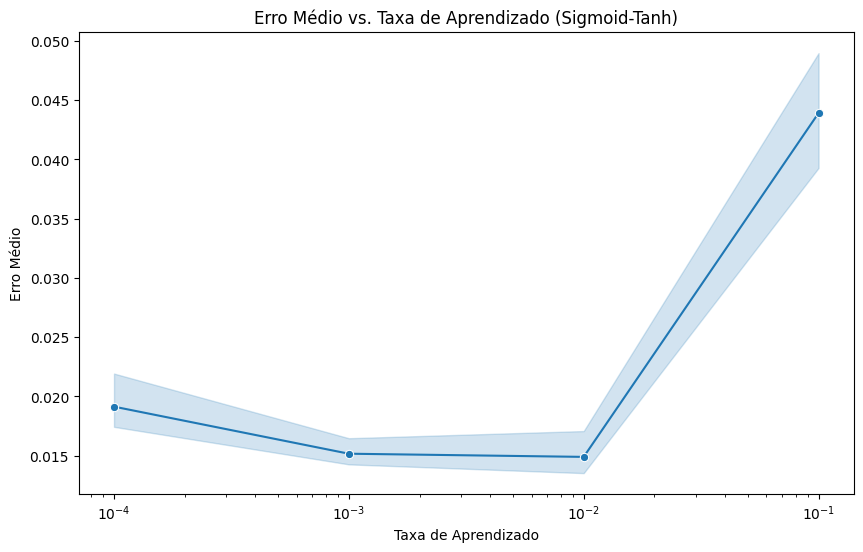

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar a acurácia em relação à taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.lineplot(x='Taxa de aprendizado', y='Acurácia', data=df_sigmoid_tanh, marker='o')
plt.title('Acurácia vs. Taxa de Aprendizado (Sigmoid-Tanh)')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.xscale('log')
plt.show()

# Plotar o erro médio em relação à taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.lineplot(x='Taxa de aprendizado', y='Erro médio', data=df_sigmoid_tanh, marker='o')
plt.title('Erro Médio vs. Taxa de Aprendizado (Sigmoid-Tanh)')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Médio')
plt.xscale('log')
plt.show()
